## Enviroment: 
Open AI gym [CartPole v0](https://github.com/openai/gym/wiki/CartPole-v0)



### Observation

Type: Box(4)

| Num  | Observation          | Min      | Max     |
| ---- | -------------------- | -------- | ------- |
| 0    | Cart Position        | -2.4     | 2.4     |
| 1    | Cart Velocity        | -Inf     | Inf     |
| 2    | Pole Angle           | ~ -41.8° | ~ 41.8° |
| 3    | Pole Velocity At Tip | -Inf     | Inf     |

### Actions

Type: Discrete(2)

| Num  | Action                 |
| ---- | ---------------------- |
| 0    | Push cart to the left  |
| 1    | Push cart to the right |

Note: The amount the velocity is reduced or increased is not fixed as it depends on the angle the pole is pointing. This is because the center of gravity of the pole increases the amount of energy needed to move the cart underneath it

### Reward

Reward is 1 for every step taken, including the termination step

### Starting State

All observations are assigned a uniform random value between ±0.05

### Episode Termination

1. Pole Angle is more than ±12°
2. Cart Position is more than ±2.4 (center of the cart reaches the edge of the display)
3. Episode length is greater than 200

### Solved Requirements

Considered solved when the average reward is greater than or equal to 195.0 over 100 consecutive trials


## 1. gym enviroment setup

In [10]:
import gym
import numpy as np
import matplotlib.pyplot as plt

env = gym.make("CartPole-v0")
env.reset()

array([ 0.04015025, -0.0001921 ,  0.00938707,  0.0064158 ])

## 2. Q Table and E trace setup

In [21]:
LEARNING_RATE = 0.5
DISCOUNT = 0.95
EPISODES = 500
SHOW_EVERY = 10
Q_TABLE_LEN = 50
LAMBDA = 0.95

In [22]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [23]:
DISCRETE_OS_SIZE = [Q_TABLE_LEN] * (len(env.observation_space.high))


observation_high = np.array([env.observation_space.high[0],
                    Q_TABLE_LEN*sigmoid(env.observation_space.high[1]),
                    env.observation_space.high[2],
                    Q_TABLE_LEN*sigmoid(env.observation_space.high[3])])

observation_low = np.array([env.observation_space.low[0],
                    Q_TABLE_LEN*sigmoid(env.observation_space.low[1]),
                    env.observation_space.low[2],
                    Q_TABLE_LEN*sigmoid(env.observation_space.low[3])])

discrete_os_win_size = (observation_high - observation_low) / DISCRETE_OS_SIZE

# q_table = np.random.uniform(low=0, high=1,
#                             size=(DISCRETE_OS_SIZE + [env.action_space.n]))

q_table = np.zeros((DISCRETE_OS_SIZE + [env.action_space.n]))
e_trace = np.zeros((DISCRETE_OS_SIZE + [env.action_space.n]))

/Users/hongtao/anaconda3/envs/spinningup/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [24]:
q_table.shape

(50, 50, 50, 50, 2)

### Decay epsilon 

In [25]:
epsilon = 1  # not a constant, qoing to be decayed
START_EPSILON_DECAYING = 1
END_EPSILON_DECAYING = EPISODES//2
epsilon_decay_value = epsilon/(END_EPSILON_DECAYING - START_EPSILON_DECAYING)

## 3. Help functions 

In [26]:
def get_discrete_state (state):
    discrete_state = (state - observation_low) // discrete_os_win_size
    return tuple(discrete_state.astype(int))

def take_epilon_greedy_action(state, epsilon):
    discrete_state = get_discrete_state(state)
    if np.random.random() < epsilon:
        action = np.random.randint(0,env.action_space.n)
    else:
        action = np.argmax(q_table[discrete_state])
    return action

## 4. Rewards Recorder setup 

In [27]:
ep_rewards = []
aggr_ep_rewards = {'ep':[],'avg':[],'min':[],'max':[]}

## 5. Train the Agent 

In [28]:
for episode in range(EPISODES):
    # initiate reward every episode
    ep_reward = 0
    if episode % SHOW_EVERY == 0:
        print("episode: {}".format(episode))
        render = True
    else:
        render = False

    state = env.reset()d
    #   reset e_trace IMPORTANT
    e_trace = np.zeros(DISCRETE_OS_SIZE + [env.action_space.n])
    
    action = take_epilon_greedy_action(state, epsilon)
    done = False

    while not done:

        next_state, reward, done, _ = env.step(action)

        ep_reward += reward
        
        next_action = take_epilon_greedy_action(state, epsilon)

        # if render:
        #     env.render()

        if not done:

            delta = reward + DISCOUNT * q_table[get_discrete_state(next_state)][next_action] - q_table[get_discrete_state(state)][action]

            e_trace[get_discrete_state(state)][action] += 1
            
            q_table += LEARNING_RATE * delta * e_trace
            
            e_trace = DISCOUNT * LAMBDA * e_trace


        state = next_state
        action = next_action

    # Decaying is being done every episode if episode number is within decaying range
    if END_EPSILON_DECAYING >= episode >= START_EPSILON_DECAYING:
        epsilon -= epsilon_decay_value

    # recoard aggrated rewards on each epsoide
    ep_rewards.append(ep_reward)

    # every SHOW_EVERY calculate average rewords
    if episode % SHOW_EVERY == 0:
        avg_reward = sum(ep_rewards[-SHOW_EVERY:]) / len(ep_rewards[-SHOW_EVERY:])
        aggr_ep_rewards['ep'].append(episode)
        aggr_ep_rewards['avg'].append(avg_reward)
        aggr_ep_rewards['min'].append(min(ep_rewards[-SHOW_EVERY:]))
        aggr_ep_rewards['max'].append(max(ep_rewards[-SHOW_EVERY:]))

episode: 0
episode: 10
episode: 20
episode: 30
episode: 40
episode: 50
episode: 60
episode: 70
episode: 80
episode: 90
episode: 100
episode: 110
episode: 120
episode: 130
episode: 140
episode: 150
episode: 160
episode: 170
episode: 180
episode: 190
episode: 200
episode: 210
episode: 220
episode: 230
episode: 240
episode: 250
episode: 260
episode: 270
episode: 280
episode: 290
episode: 300
episode: 310
episode: 320
episode: 330
episode: 340
episode: 350
episode: 360
episode: 370
episode: 380
episode: 390
episode: 400
episode: 410
episode: 420
episode: 430
episode: 440
episode: 450
episode: 460
episode: 470
episode: 480
episode: 490


Text(0, 0.5, 'Rewards')

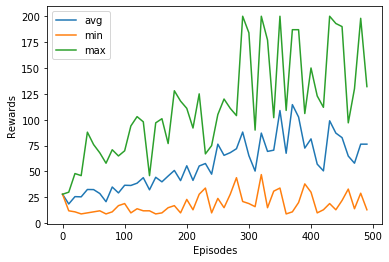

In [29]:
plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['avg'], label = 'avg')
plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['min'], label = 'min')
plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['max'], label = 'max')
plt.legend(loc='upper left')
plt.xlabel('Episodes')
plt.ylabel('Rewards')

### 6. Rendering Test

In [32]:
done = False
state = env.reset()
while not done:
    action = np.argmax(q_table[get_discrete_state(state)])
    next_state, _, done, _ = env.step(action)
    state = next_state
    env.render()

env.close()